# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
TMDb Movie data set contains information about 10,000 movies. The data set contains information about the genre of each film, its release date, budget, revenue, and the number of votes cast. An analysis of the following questions will be conducted through the corresponding data set.

My Questions

 - Has the film industry been making profits over the past few decades?
 - What variables are related to the profits of the movie?

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [59]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [61]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Delete duplicate values

In [62]:
sum(df.duplicated()) # find duplicated data row

1

In [63]:
df.drop_duplicates(inplace = True) # delete duplicated data row

In [64]:
sum(df.duplicated()) # confirm correction by rechecking

0

### Drop Null value

There is data with budget, revenue, and runtime values of zero, and the data is deleted so that there are no errors in the analysis.

In [65]:
target_col = ['budget','revenue','runtime']
df[target_col] = df[target_col].replace(0, np.NaN) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
df.dropna(subset = target_col, inplace = True)
df.shape

(3854, 21)

Check and correct the data type for each column.

In [66]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Modify the data type of the release date.

In [67]:
df.release_date = pd.to_datetime(df['release_date']) #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Has the film industry been making profits over the past few decades?

1. Define Profit as (Revenue - Budget)

In [68]:
df.insert(1,"profit",df["revenue"] - df["budget"])

In [69]:
df.head(3)

,id,profit,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,1.363529e+09,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,2.284364e+08,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,1.852382e+08,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


2. Calculates the average profit by released_year.

In [70]:
def groupby_avg(column1,column2):
    avg_gb_data = df.groupby(column1)[column2].mean()
    return avg_gb_data

3. Visualize the relationship between profit and released_year

Text(0,0.5,'Profit')

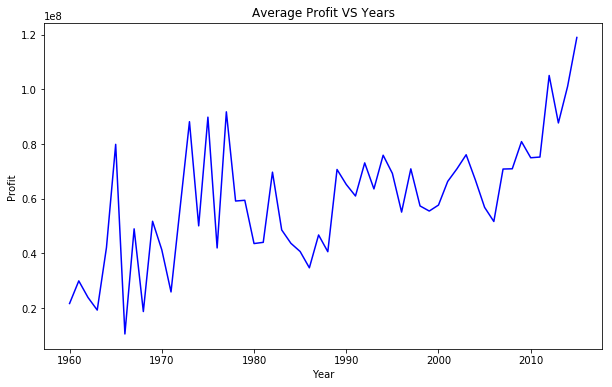

In [71]:
avg_profit_year = groupby_avg("release_year","profit")

avg_profit_year.plot(kind='line',color='blue',title='Average Profit VS Years',figsize = (10,6))

plt.xlabel('Year') # x-axis name
plt.ylabel('Profit') # y-axis name

As you can see from the table above, the film industry has been steadily growing so far.

### Research Question 2 : What variables are related to the profits of the movie?
To answer the above questions, scatterplots and correlation coefficients were calculated for each independent variable.
I set the revenue, budget, and popularity as independent variables.

Before analysis, we will conduct exploration of a single variable.

In [72]:
print(min(df.revenue))
print(max(df.revenue))

2.0
2781505847.0


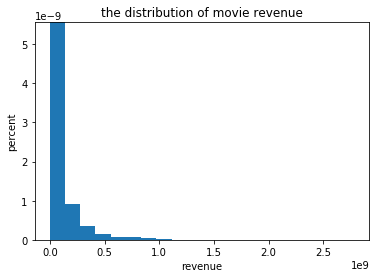

In [73]:
plt.hist(df.revenue,density=True, bins=20)
plt.title("the distribution of movie revenue")
plt.xlabel("revenue")
plt.ylabel("percent")
plt.show()

Most movie revenues range from 0 to $500 million.

First, an analysis of the relationship between revenue and profit was conducted.

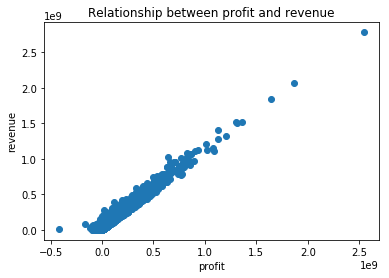

In [74]:
plt.scatter(df.profit,df.revenue)
plt.title("Relationship between profit and revenue")
plt.xlabel("profit")
plt.ylabel("revenue")
plt.show()

In [75]:
r = np.corrcoef(df.profit,df.revenue)
print(r)

[[ 1.         0.9791334]
 [ 0.9791334  1.       ]]


The correlation coefficient between revenue and profit was approximately 0.98, which was found to be quite closely related. Of course, it seems important to generate large revenues first in order to make a profit.

Next, an analysis was conducted on the relationship between profit and budget.

In [76]:
print(min(df.budget))
print(max(df.budget))

1.0
425000000.0


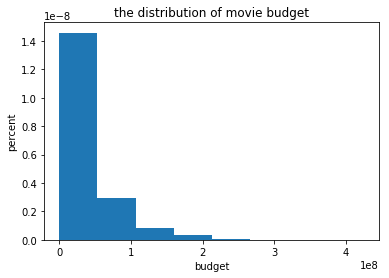

In [77]:
plt.hist(df.budget,density=True, bins=8)
plt.title("the distribution of movie budget")
plt.xlabel("budget")
plt.ylabel("percent")
plt.show()

Most movie budgets range from 0 to $500 million.

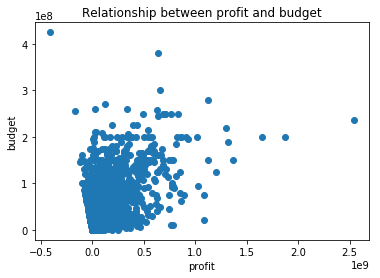

In [78]:
plt.scatter(df.profit,df.budget)
plt.title("Relationship between profit and budget")
plt.xlabel("profit")
plt.ylabel("budget")
plt.show()

In [79]:
r = np.corrcoef(df.profit,df.budget)
print(r)

[[ 1.          0.52681765]
 [ 0.52681765  1.        ]]


The correlation coefficient between profit and budget was found to be about 0.52, showing a somewhat weak relationship.

Finally, an analysis of the relationship between profit and popularity was conducted.

In [50]:
print(min(df.popularity))
print(max(df.popularity))

0.001117
32.985763


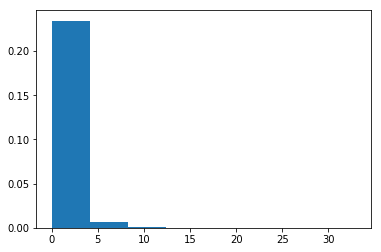

In [46]:
plt.hist(df.popularity,density=True, bins=8)
plt.title("the distribution of movie popularity")
plt.xlabel("popularity")
plt.ylabel("percent")
plt.show()

Most movie popularities are distributed between 0 and 5 values.

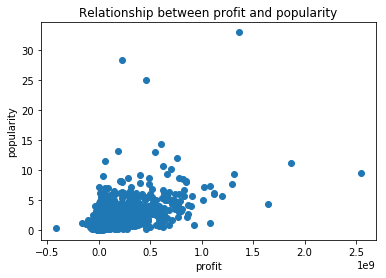

In [55]:
plt.scatter(df.profit,df.popularity)
plt.title("Relationship between profit and popularity")
plt.xlabel("profit")
plt.ylabel("popularity")
plt.show()

In [56]:
r = np.corrcoef(df.profit,df.popularity)
print(r)

[[ 1.          0.59620137]
 [ 0.59620137  1.        ]]


The correlation between profit and preference was found to be approximately 0.6 with some degree of definition correlation.

<a id='conclusions'></a>
## Conclusions

 - The film industry is steadily growing.
 - Factors affecting profits of the movie vary.
 
 
## Limitation
 - Because of the null value of the data, there is a limit to the analysis.
 - The regression analysis performed does not conclude on linear relationships due to the limitations of the number of data and the limitations of the regression itself.

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0